In [1]:
import os
import shutil
import pandas as pd
import numpy as np

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [4]:
# Settings for displaying charts
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams.update({'font.size': 12})

In [5]:
# TensorFlow settings
AUTOTUNE = tf.data.experimental.AUTOTUNE
IMG_SIZE = 299
BATCH_SIZE = 32

In [6]:
data_path = 'source/images'

In [7]:
# for subfolder in os.listdir(data_path):
#
#     original_path = f'{data_path}/{subfolder}'
#     original_data = os.listdir(original_path)
#
#     n_samples = len(original_data)
#     train_samples = int(n_samples * 0.75)
#     valid_samples = int(n_samples * 0.1)
#
#     train_path = os.path.join('source/temp/train', subfolder)
#     valid_path = os.path.join('source/temp/valid', subfolder)
#     test_path = os.path.join('source/temp/test', subfolder)
#
#     # Create class subfolders for training, validation, and testing:
#     os.makedirs(train_path, exist_ok=True)
#     os.makedirs(valid_path, exist_ok=True)
#     os.makedirs(test_path, exist_ok=True)
#
#     # Training images:
#     for image in original_data[:train_samples]:
#         original_file = os.path.join(original_path, image)
#         new_file = os.path.join(train_path, image)
#         shutil.copyfile(original_file, new_file)
#
#     # Validation images:
#     for image in original_data[train_samples:train_samples + valid_samples]:
#         original_file = os.path.join(original_path, image)
#         new_file = os.path.join(valid_path, image)
#         shutil.copyfile(original_file, new_file)
#
#     # Test images:
#     for image in original_data[train_samples + valid_samples:]:
#         original_file = os.path.join(original_path, image)
#         new_file = os.path.join(test_path, image)
#         shutil.copyfile(original_file, new_file)

In [8]:
print('train dataset')
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)\
                    .flow_from_directory(directory='source/temp/train',
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)
print('valid dataset')
valid_generator = ImageDataGenerator(preprocessing_function=preprocess_input)\
                    .flow_from_directory(directory='source/temp/valid',
                                         target_size=(IMG_SIZE, IMG_SIZE), class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)
print('test dataset')
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)\
                    .flow_from_directory(directory='source/temp/test',
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

train dataset
Found 3325 images belonging to 3 classes.
valid dataset
Found 443 images belonging to 3 classes.
test dataset
Found 667 images belonging to 3 classes.


In [9]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 150, 150, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 150, 150, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 150, 150, 32)         0         ['bn_Conv1[

In [10]:
global_average_layer = GlobalAveragePooling2D()
prediction_layer = Dense(3, activation='softmax')
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [11]:
base_learning_rate = 0.0001
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 10, 10, 1280)      2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [12]:
epochs_num = 20
history = model.fit(train_generator, validation_data=valid_generator,
                    epochs=epochs_num, steps_per_epoch=20, validation_steps=10)

Epoch 1/20
20/20 [==============================] - 59s 3s/step - loss: 0.8760 - accuracy: 0.6219 - val_loss: 0.6657 - val_accuracy: 0.7594
Epoch 2/20
20/20 [==============================] - 52s 3s/step - loss: 0.5642 - accuracy: 0.7734 - val_loss: 0.5203 - val_accuracy: 0.8156
Epoch 3/20
20/20 [==============================] - 52s 3s/step - loss: 0.4836 - accuracy: 0.8234 - val_loss: 0.4496 - val_accuracy: 0.8281
Epoch 4/20
20/20 [==============================] - 56s 3s/step - loss: 0.4486 - accuracy: 0.8399 - val_loss: 0.4015 - val_accuracy: 0.8438
Epoch 5/20
20/20 [==============================] - 52s 3s/step - loss: 0.4013 - accuracy: 0.8438 - val_loss: 0.3574 - val_accuracy: 0.8813
Epoch 6/20
20/20 [==============================] - 52s 3s/step - loss: 0.3751 - accuracy: 0.8609 - val_loss: 0.3521 - val_accuracy: 0.8813
Epoch 7/20
20/20 [==============================] - 51s 3s/step - loss: 0.3384 - accuracy: 0.8828 - val_loss: 0.3110 - val_accuracy: 0.8844
Epoch 8/20
20/20 [==

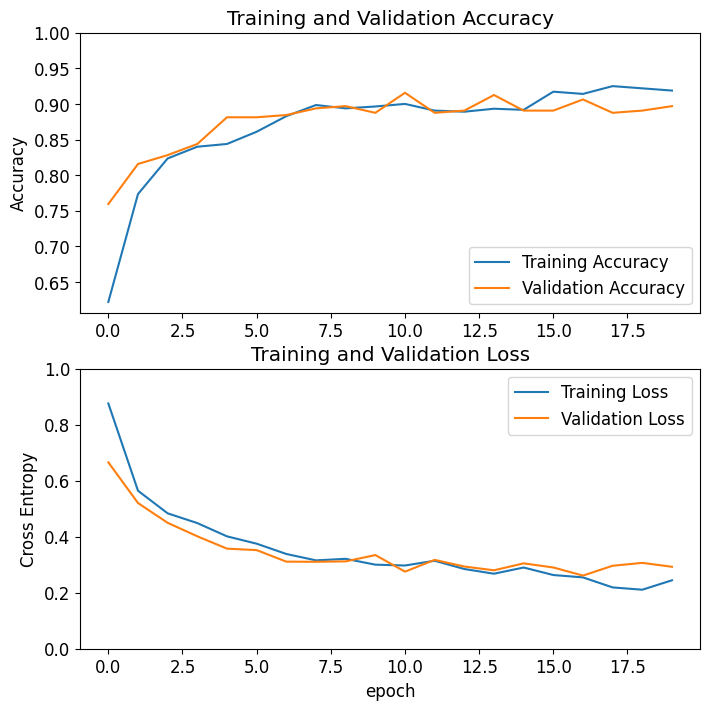

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [14]:
loss, accuracy = model.evaluate(test_generator, steps=10, verbose=2)
print(f'Model performance on test images:\nAccuracy = {accuracy}\nLoss = {loss}')

10/10 - 18s - loss: 0.3390 - accuracy: 0.8750 - 18s/epoch - 2s/step
Model performance on test images:
Accuracy = 0.875
Loss = 0.339021772146225


In [15]:
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

21/21 [==============================] - 37s 2s/step


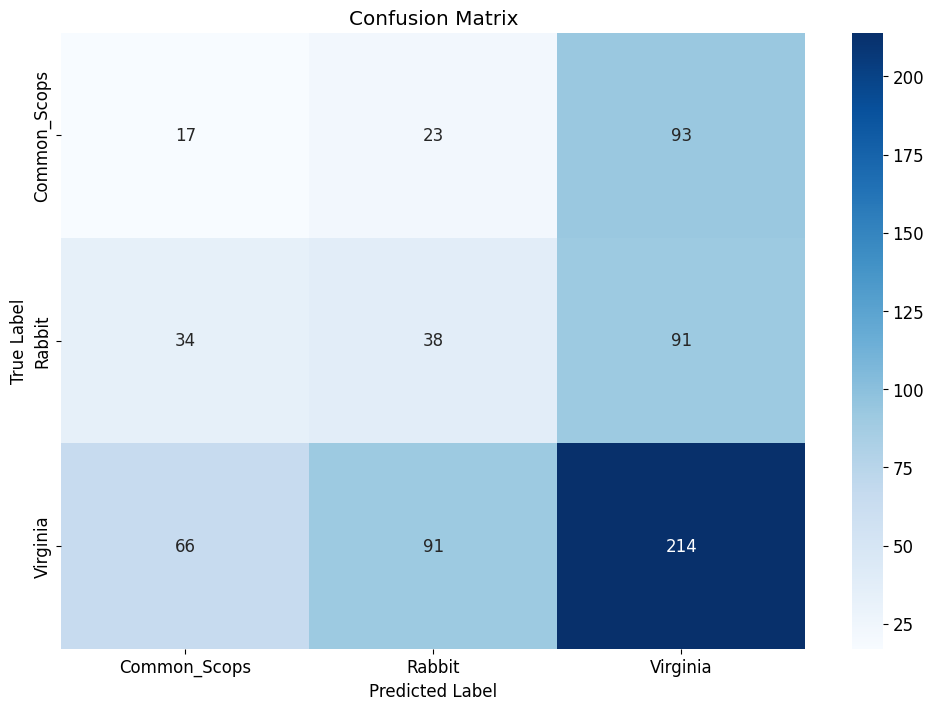

In [16]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
print('Classification Report:\n', classification_report(y_true, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.13      0.14       133
           1       0.25      0.23      0.24       163
           2       0.54      0.58      0.56       371

    accuracy                           0.40       667
   macro avg       0.31      0.31      0.31       667
weighted avg       0.39      0.40      0.40       667



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Predicted: Виргинский филин, Real: Виргинский филин')

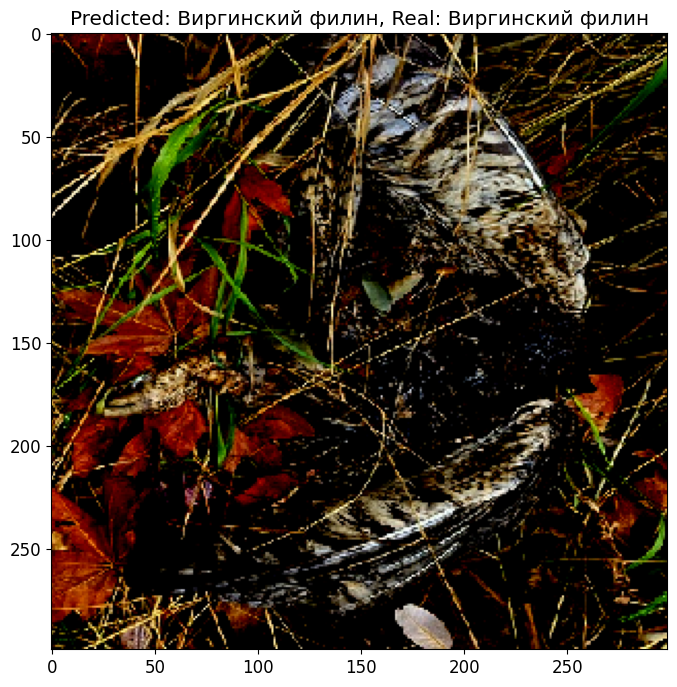

In [18]:
import random

random_index = random.randint(0, len(test_generator) - 1)
random_image, random_label = test_generator[random_index]
plt.imshow(random_image[0])
image_class = y_pred_classes[random_index]
mapping = {0: 'Обыкновенная сипуха',
           1: 'Кроличий сыч',
           2: 'Виргинский филин'}
plt.title(f'Predicted: {mapping[image_class]}, Real: {mapping[np.argmax(random_label[0])]}')

In [19]:
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [20]:
fine_tune_at = 150

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
epochs_for_tuning = 5
history_fine = model.fit(train_generator, epochs=epochs_num + epochs_for_tuning,
                         initial_epoch=history.epoch[-1],
                         validation_data=valid_generator)

Epoch 20/25
104/104 [==============================] - 236s 2s/step - loss: 0.4388 - accuracy: 0.8608 - val_loss: 0.3820 - val_accuracy: 0.8804
Epoch 21/25
104/104 [==============================] - 225s 2s/step - loss: 0.1207 - accuracy: 0.9537 - val_loss: 0.4250 - val_accuracy: 0.8758
Epoch 22/25
104/104 [==============================] - 224s 2s/step - loss: 0.0384 - accuracy: 0.9904 - val_loss: 0.4947 - val_accuracy: 0.8600
Epoch 23/25
104/104 [==============================] - 247s 2s/step - loss: 0.0281 - accuracy: 0.9934 - val_loss: 0.4342 - val_accuracy: 0.8849
Epoch 24/25
104/104 [==============================] - 230s 2s/step - loss: 0.0152 - accuracy: 0.9982 - val_loss: 0.3485 - val_accuracy: 0.9029
Epoch 25/25
104/104 [==============================] - 225s 2s/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.3970 - val_accuracy: 0.8916


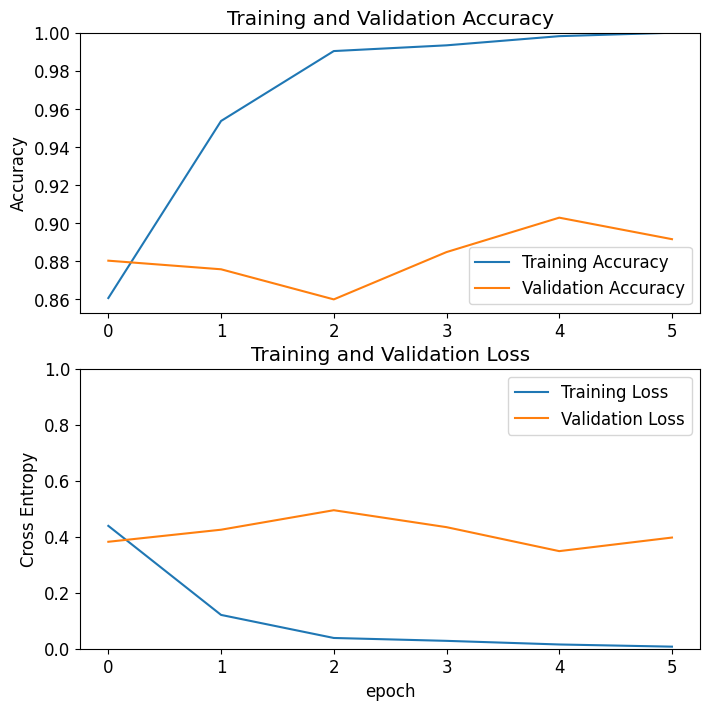

In [23]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
loss, accuracy = model.evaluate(test_generator, steps=10, verbose=2)
print(f'Fine tuned model performance on test images:\nAccuracy = {accuracy}\nLoss = {loss}')

10/10 - 20s - loss: 0.4678 - accuracy: 0.8969 - 20s/epoch - 2s/step
Fine tuned model performance on test images:
Accuracy = 0.8968750238418579
Loss = 0.46784883737564087


In [25]:
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

21/21 [==============================] - 41s 2s/step


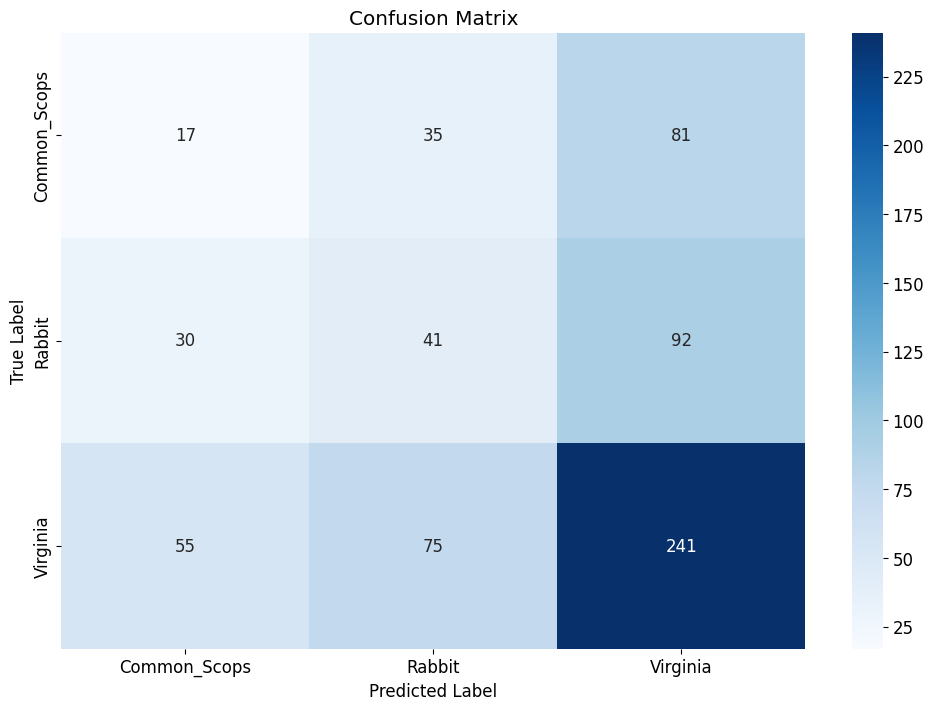

In [26]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
print('Classification Report:\n', classification_report(y_true, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.13      0.14       133
           1       0.27      0.25      0.26       163
           2       0.58      0.65      0.61       371

    accuracy                           0.45       667
   macro avg       0.34      0.34      0.34       667
weighted avg       0.42      0.45      0.43       667



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Predicted: Виргинский филин, Real: Виргинский филин')

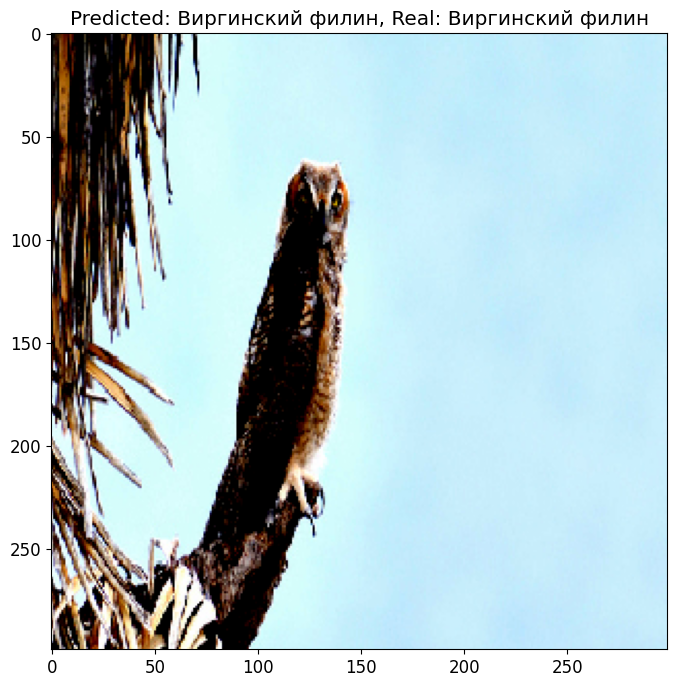

In [30]:
import random

random_index = random.randint(0, len(test_generator) - 1)
random_image, random_label = test_generator[random_index]
plt.imshow(random_image[0])
image_class = y_pred_classes[random_index]
mapping = {0: 'Обыкновенная сипуха',
           1: 'Кроличий сыч',
           2: 'Виргинский филин'}
plt.title(f'Predicted: {mapping[image_class]}, Real: {mapping[np.argmax(random_label[0])]}')